In [1079]:
import pandas as pd
import numpy as np

In [1080]:
# List all csv files
csv_files = ['Combined_Final_DE.csv','Combined_Final_EN.csv','Combined_Final_FR.csv']
# Create a list of data frames
dfs = []
# iterate through list of csv_files to create data frames
for csv_file in csv_files:
    file_name = r'data/raw/'+csv_file
    df = pd.read_csv(file_name, sep=';')
    dfs.append(df)
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   month               279 non-null    object 
 1   Wiki Views DE       100 non-null    float64
 2   Devices DE_Desktop  100 non-null    float64
 3   Devices DE_Mobile   100 non-null    float64
 4   Edits DE            278 non-null    float64
 5   Active Editors DE   276 non-null    float64
 6   Edited Pages DE     278 non-null    float64
 7   New Users DE        276 non-null    float64
 8   Total Pages DE      278 non-null    float64
dtypes: float64(8), object(1)
memory usage: 19.7+ KB


In [1081]:
# Create data frame list for last five years
five_yr_dfs = []
# Iterate through dfs to add year column to all data frames
# and then add last 5 year data to new five_yr_dfs
for df in dfs:
    df["month"] = pd.to_datetime(df["month"], errors='coerce')
    df['year'] = df['month'].dt.year
    five_yr_dfs.append(df[df['year'] >= 2019])

In [1082]:
for df in five_yr_dfs:
    print("null check")
    display(df.isnull().sum())
    print(f"Duplicate check: {df.duplicated().sum()} \n")

null check


month                 0
Wiki Views DE         0
Devices DE_Desktop    0
Devices DE_Mobile     0
Edits DE              0
Active Editors DE     0
Edited Pages DE       0
New Users DE          0
Total Pages DE        0
year                  0
dtype: int64

Duplicate check: 0 

null check


month                 0
Wiki Views EN         0
New Users EN          0
Total Pages EN        0
Edited Pages EN       0
Active Editors EN     0
Devices EN_Desktop    0
Devices EN_Mobile     0
Edits EN              0
year                  0
dtype: int64

Duplicate check: 0 

null check


month                 0
Wiki Views FR         0
Edited Pages FR       0
Total Pages FR        0
Active Editors FR     0
New User FR           0
Edits FR              0
Devices FR_Desktop    0
Devices FR_Mobile     0
year                  0
dtype: int64

Duplicate check: 0 



In [1083]:
#Clean column names
for df in five_yr_dfs:
    df.rename(columns={col:col.strip().lower().replace(' ','_') for col in df.columns}, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20172\315478648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={col:col.strip().lower().replace(' ','_') for col in df.columns}, inplace=True)


In [1084]:
# Creating Cleaned csv file
for df in five_yr_dfs:
    language = [col for col in df.columns if col.startswith('wiki_views_')]
    language_code = language[0][-2:]
    file_name = 'data/cleaned/Wikipedia_data_'+language_code.upper()+".csv"
    display(file_name)
    df.to_csv(file_name, index=False)

'data/cleaned/Wikipedia_data_DE.csv'

'data/cleaned/Wikipedia_data_EN.csv'

'data/cleaned/Wikipedia_data_FR.csv'

In [1085]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1086]:
# Create data frame for all cleaned files
df_de = pd.read_csv(r'data/cleaned/Wikipedia_data_DE.csv')
df_en = pd.read_csv(r'data/cleaned/Wikipedia_data_EN.csv')
df_fr = pd.read_csv(r'data/cleaned/Wikipedia_data_FR.csv')

In [1087]:
df_de['locale']='DE'
df_en['locale']='EN'
df_fr['locale']='FR'

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


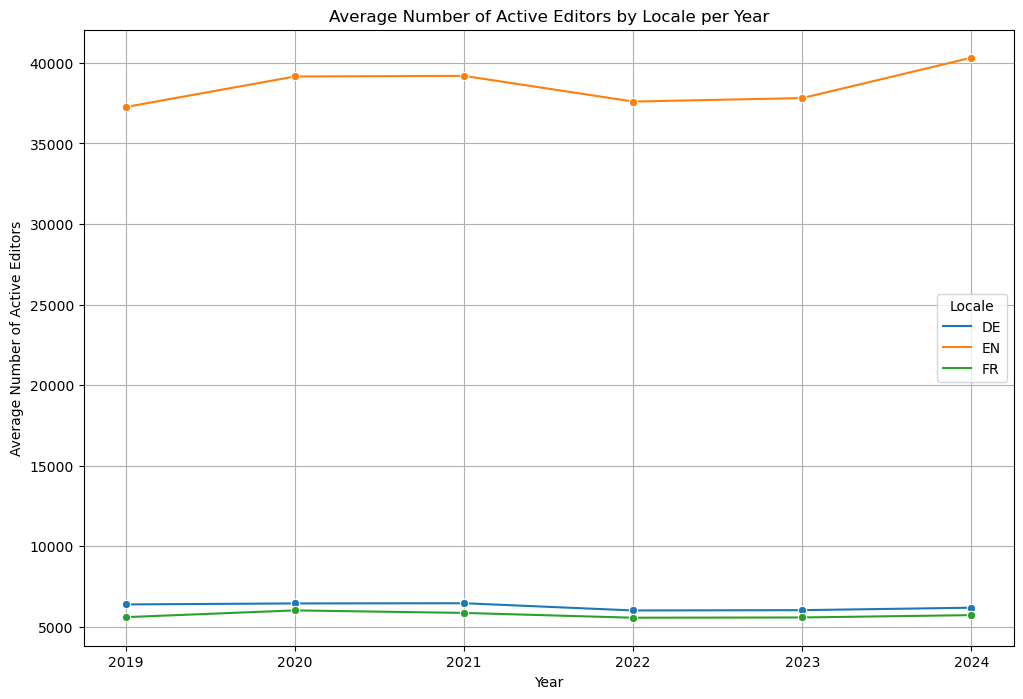

In [1088]:
# Impact of Active Editors on Edits
# Hypothesis: The number of edits made in EN locale is higher compared to other locales

# Adding the active editors column for consistency in combined_df
df_de['active_editors'] = df_de['active_editors_de']
df_en['active_editors'] = df_en['active_editors_en']
df_fr['active_editors'] = df_fr['active_editors_fr']

# Combining the DataFrames
combined_df = pd.concat([df_de, df_en, df_fr])

# Grouping by locale and year to calculate the average number of active editors
result_df = combined_df.groupby(['locale', 'year']).agg({'active_editors': 'mean'}).reset_index()
result_df['avg_active_editors'] = result_df['active_editors'].round()

# Plotting the results
plt.figure(figsize=(12, 8))
sns.lineplot(data=result_df, x='year', y='avg_active_editors', hue='locale', marker='o')
plt.title('Average Number of Active Editors by Locale per Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Active Editors')
plt.legend(title='Locale')
plt.grid(True)

plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


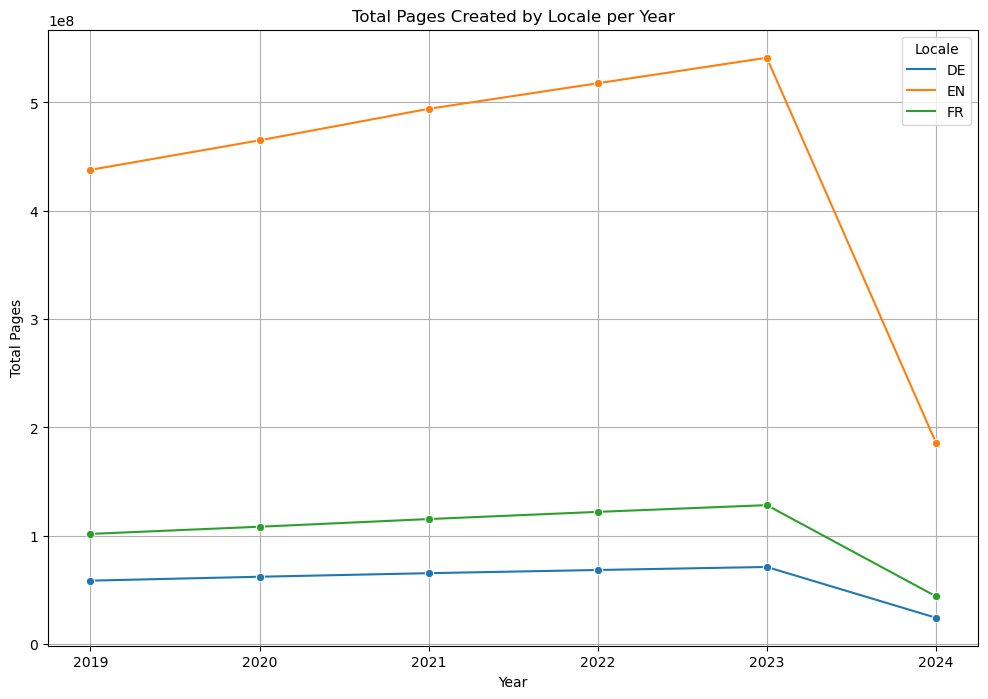

In [1089]:
# Growth in Total Pages
# Hypothesis: The number of total pages on Wikipedia has steadily increased over the years in each locale. We see a drop in 2024 because the year hasn't completed yet.

# Adding the total pages column for consistency in combined_df
df_de['total_pages'] = df_de['total_pages_de']
df_en['total_pages'] = df_en['total_pages_en']
df_fr['total_pages'] = df_fr['total_pages_fr']

# Combining the DataFrames
combined_df = pd.concat([df_de, df_en, df_fr])

# Grouping by locale and year to sum the total pages
result_df = combined_df.groupby(['locale', 'year']).agg({'total_pages': 'sum'}).reset_index()

# Display numbers in millions
result_df['total_pages_millions'] = result_df['total_pages'] / 1e6

# Plotting the results Total Pages Created by Locale per Year
# Plotting the results
plt.figure(figsize=(12, 8))
sns.lineplot(data=result_df, x='year', y='total_pages', hue='locale', marker='o')
plt.title('Total Pages Created by Locale per Year')
plt.xlabel('Year')
plt.ylabel('Total Pages')
plt.legend(title='Locale')
plt.grid(True)
plt.show()

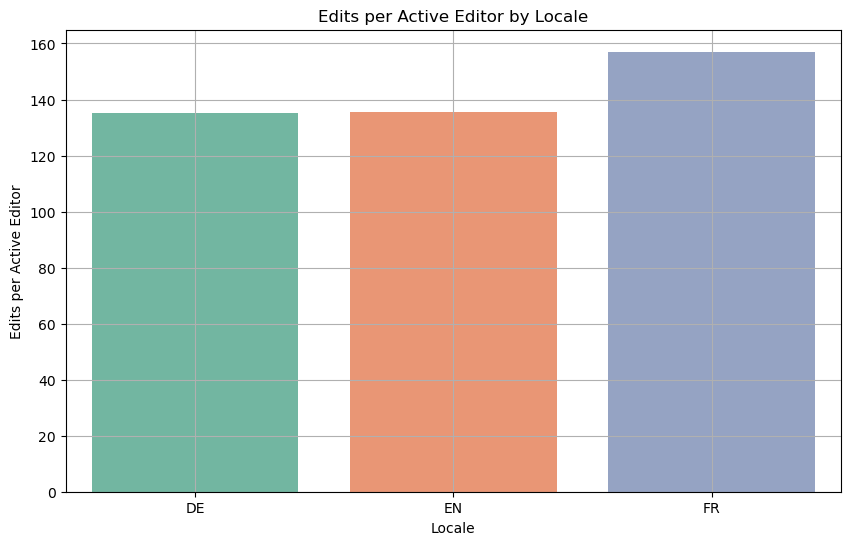

In [1137]:
# Impact of Active Editors on Edits
# Hypothesis: The number of edits per editor in FE is higher compared to DE and EN.

# Adding the active editors column for consistency in combined_df
df_de['active_editors'] = df_de['active_editors_de']
df_en['active_editors'] = df_en['active_editors_en']
df_fr['active_editors'] = df_fr['active_editors_fr']

df_de['edits'] = df_de['edits_de']
df_en['edits'] = df_en['edits_en']
df_fr['edits'] = df_fr['edits_fr']

# Combining the DataFrames
combined_df = pd.concat([df_de, df_en, df_fr])

# Grouping by locale to sum the active editors and edits
result_df = combined_df.groupby('locale').agg({
    'active_editors': 'sum',
    'edits': 'sum'
}).reset_index()

# Calculating edits per editor
result_df['edits_per_editor'] = result_df.apply(lambda row: row['edits'] / row['active_editors'], axis=1)

# Plotting edits per editor for each locale
plt.figure(figsize=(10, 6))
sns.barplot(data=result_df, x='locale', y='edits_per_editor', palette='Set2')
plt.title('Edits per Active Editor by Locale')
plt.xlabel('Locale')
plt.ylabel('Edits per Active Editor')
plt.grid(True)
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


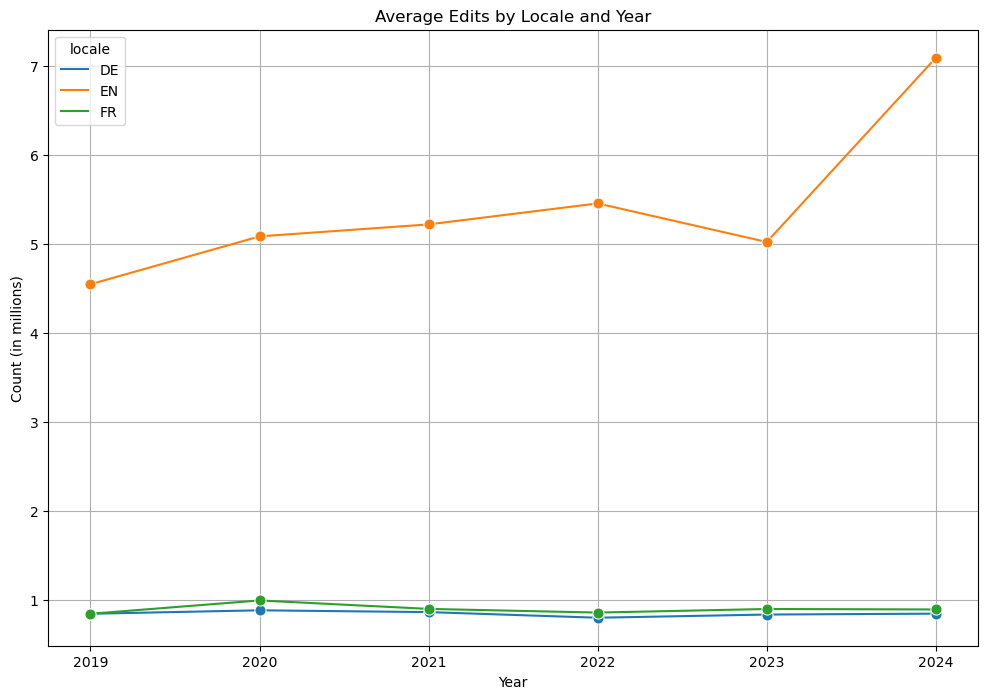

In [1092]:
# Impact of Edits on Page Views
# Hypothesis: Pages that are frequently edited experience higher page views.

# Adding  the columns for consistency in combined_df
df_de['edits'] = df_de['edits_de']
df_en['edits'] = df_en['edits_en']
df_fr['edits'] = df_fr['edits_fr']

df_de['wiki_views'] = df_de['wiki_views_de']
df_en['wiki_views'] = df_en['wiki_views_en']
df_fr['wiki_views'] = df_fr['wiki_views_fr']

# Combining the DataFrames
combined_df = pd.concat([df_de, df_en, df_fr])
# Grouping by locale, year to calculate average edits and average page views
result_df = combined_df.groupby(['locale', 'year']).agg({
    'edits': 'mean',
    'wiki_views': 'mean'
}).reset_index()

# Calculate edits per editor
result_df['avg_edits'] = result_df['edits'] / 1e6


# Plotting the results
plt.figure(figsize=(12, 8))
sns.lineplot(data=result_df, x='year', y='avg_edits', hue='locale', marker='o', linestyle='-', markersize=8)
plt.title('Average Edits by Locale and Year')
plt.xlabel('Year')
plt.ylabel('Count (in millions)')
plt.grid(True)
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


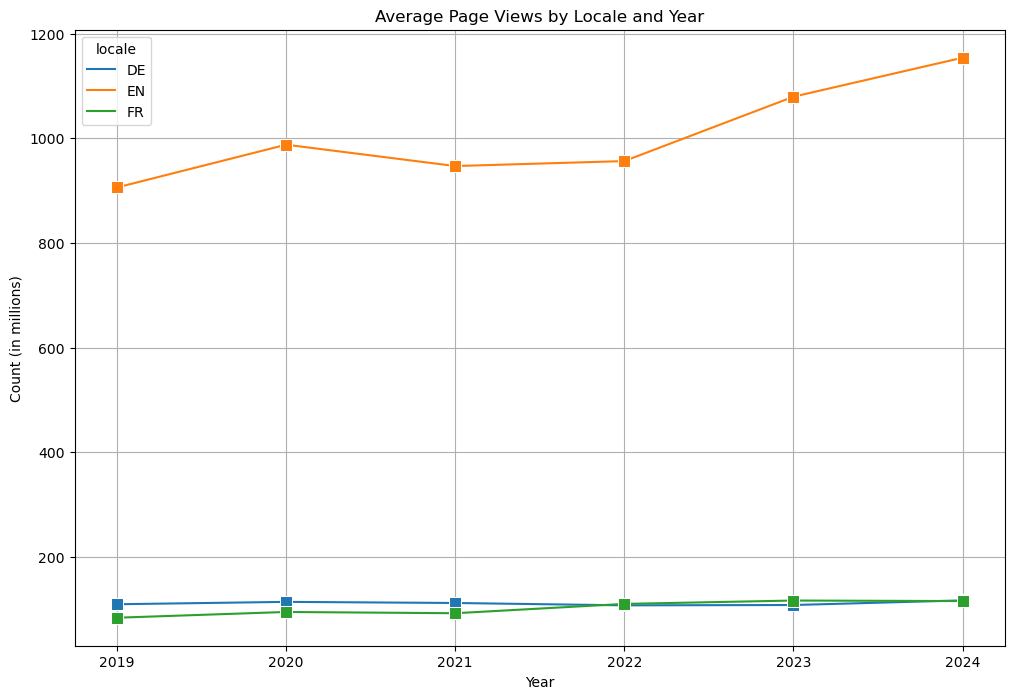

In [1093]:
result_df['avg_page_views'] = result_df['wiki_views'] / 1e7

# Plotting the results
plt.figure(figsize=(12, 8))
sns.lineplot(data=result_df, x='year', y='avg_page_views', hue='locale', marker='s', linestyle='-', markersize=8)
plt.title('Average Page Views by Locale and Year')
plt.xlabel('Year')
plt.ylabel('Count (in millions)')
plt.grid(True)
plt.show()

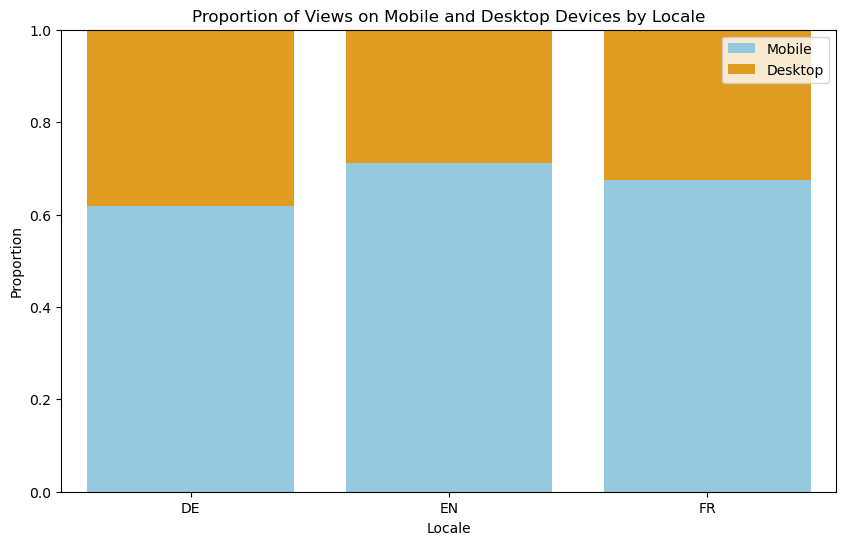

In [1094]:
# Device Usage Patterns
# Hypothesis: Wikipedia articles are widely viewed on Mobile devices than Desktop.

# Calculate the sum of mobile and desktop views
mobile_views_de = df_de['devices_de_mobile'].sum()
desktop_views_de = df_de['devices_de_desktop'].sum()

mobile_views_en = df_en['devices_en_mobile'].sum()
desktop_views_en = df_en['devices_en_desktop'].sum()

mobile_views_fr = df_fr['devices_fr_mobile'].sum()
desktop_views_fr = df_fr['devices_fr_desktop'].sum()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'locale': ['DE', 'EN', 'FR'],
    'mobile_views': [mobile_views_de, mobile_views_en, mobile_views_fr],
    'desktop_views': [desktop_views_de, desktop_views_en, desktop_views_fr]
})

# Calculate the proportion of mobile and desktop views
summary_df['mobile_proportion'] = summary_df['mobile_views'] / (summary_df['mobile_views'] + summary_df['desktop_views'])
summary_df['desktop_proportion'] = summary_df['desktop_views'] / (summary_df['mobile_views'] + summary_df['desktop_views'])

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x='locale', y='mobile_proportion', color='skyblue', label='Mobile')
sns.barplot(data=summary_df, x='locale', y='desktop_proportion', color='orange', label='Desktop', bottom=summary_df['mobile_proportion'])
plt.title('Proportion of Views on Mobile and Desktop Devices by Locale')
plt.xlabel('Locale')
plt.ylabel('Proportion')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.legend()
plt.show()